## ENVM1400 - I & A - Volta group - DGRE
made by: David Haasnoot

In [56]:
import glob
import os

# data/plot management
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import warnings

# plotting/mapmaknig
import geopandas as gpd
from geospatial_functions import get_background_map
import rasterio
from rasterio.plot import show as rioshow
import folium

warnings.simplefilter('ignore')

All data from the different sources is combined in this notebook

In [57]:
path = os.getcwd()
home_path = os.path.dirname(path)
main_folder = os.path.dirname(home_path)

gis_folder = f'{main_folder}\\QGIS project'

Load in gis data

In [58]:
country_outline = gpd.read_file(f"{gis_folder}\\country_outline_32630.gpkg")
volta_outline = gpd.read_file(f"{gis_folder}\\volta_watershed_vector_32630.gpkg",crs="epsg:32630")
main_rivers = gpd.read_file(f"{gis_folder}\\main_rivers_volta.gpkg",crs="epsg:32630")

country_outline = country_outline.set_geometry(country_outline.geometry.to_crs('EPSG:4326'))
volta_outline = volta_outline.set_geometry(volta_outline.geometry.to_crs('EPSG:4326'))
main_rivers = main_rivers.set_geometry(main_rivers.geometry.to_crs('EPSG:4326'))

In [59]:
glob.glob("*.geojson")

['discharge_data_client.geojson',
 'discharge_data_reasearch_gate.geojson',
 'precipitation_data_client.geojson']

In [60]:
gdf_precip = gpd.read_file('precipitation_data_client.geojson',crs="EPSG:4326")
gdf_discharge_research_gate = gpd.read_file('discharge_data_reasearch_gate.geojson',crs="EPSG:4326")
gdf_discharge_client = gpd.read_file('discharge_data_client.geojson',crs="EPSG:4326")

In [61]:
gdf_discharge_client

name        lat       lon  \
0              BLACK VOLTA, VONKORO.txt   9.171205 -2.744841   
1                   BOUGOURIBA, DAN.txt  10.867876 -3.722479   
2  MOU HOUN, BLACK VOLTA, SAMANDENI.txt  11.458715 -4.469477   
3      MOU HOUN, BLACK VOLTA,DAPOLA.txt  10.572862 -2.914135   
4      NAKANBE, WHITE VOLTA, YAKALA.txt  11.344608 -0.528965   
5       NAKANBE, WHITE VOLTA, YILOU.txt  12.999710 -1.570603   
6        NAZINON, RED VOLTA, DAKAYE.txt  11.777456 -1.600156   
7                   PENDJARI, PORGA.txt  11.045433  0.959914   
8                  SINGOU, SAMBOALI.txt  11.279537  1.015889   

                    geometry  
0   POINT (-2.74484 9.17121)  
1  POINT (-3.72248 10.86788)  
2  POINT (-4.46948 11.45872)  
3  POINT (-2.91413 10.57286)  
4  POINT (-0.52897 11.34461)  
5  POINT (-1.57060 12.99971)  
6  POINT (-1.60016 11.77746)  
7   POINT (0.95991 11.04543)  
8   POINT (1.01589 11.27954)

(5.5, 15.5)

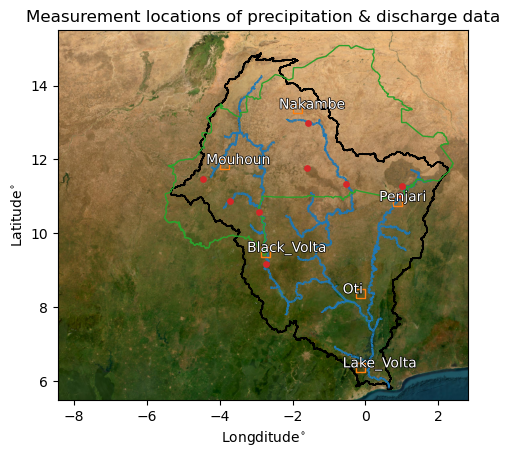

In [62]:
# quick way to get the bounds 
fig, ax = plt.subplots()

#adding features
volta_outline.plot(ax=ax,edgecolor="k", facecolor='none')
main_rivers.plot(ax=ax, color="C0",zorder=1)
country_outline.plot(ax=ax, facecolor="none", edgecolor="C2",zorder=6)

# get the bounds to add background
bounds_stations = (ax.get_xlim()[0], ax.get_ylim()[0], ax.get_xlim()[1], ax.get_ylim()[1])

# add stations
gdf_discharge_client.plot(ax=ax,color="C3",markersize=15,zorder=10)
with rasterio.open(get_background_map("stations", bounds_stations)) as r:
    rioshow(r, ax=ax)

gdf_precip.plot(ax=ax, facecolor="none",edgecolor="C1",zorder=10)

# add labels
mid_points = gdf_precip.geometry.centroid
for index, name in enumerate(gdf_precip.name):
    ax.annotate(f"{name}" , 
                (mid_points.iloc[index].x-0.5,mid_points.iloc[index].y),zorder=10, color="w",
                 path_effects=[matplotlib.patheffects.withStroke(linewidth=1, foreground="k")])
# set appearance
ax.set_title("Measurement locations of precipitation & discharge data")
ax.set_xlabel("Longditude$^{\circ}$");
ax.set_ylabel("Latitude$^{\circ}$");

ax.set_ylim((5.5,15.5))

In [63]:
Black_Volta_precip_geom = gdf_precip.iloc[1].geometry

In [64]:

selected_segement =  main_rivers[main_rivers.within(Black_Volta_precip_geom)]
selected_location = main_rivers.loc[selected_segement.index[-1],:]
selected_location

HYRIV_ID                                               10656791
NEXT_DOWN                                              10658188
MAIN_RIV                                               10821582
LENGTH_KM                                                  2.97
DIST_DN_KM                                                901.0
DIST_UP_KM                                                978.2
CATCH_SKM                                                 17.37
UPLAND_SKM                                             116111.9
ENDORHEIC                                                     0
DIS_AV_CMS                                              150.135
ORD_STRA                                                      7
ORD_CLAS                                                      1
ORD_FLOW                                                      4
HYBAS_L12                                            1120844160
geometry      (LINESTRING (-2.6770833333335986 9.41041666666...
Name: 943, dtype: object

In [65]:
area_upstream_black_volta_border = selected_location.UPLAND_SKM

## load discharge & precipitation data from analysis

In [85]:
Rainfall_BF_msum = pd.read_excel("Monthly_sum_rainfall.xlsx",index_col=0)
Rainfall_BF_msum

Black_Volta     Mouhoun     Nakambe     Penjari
Date                                                       
1981-01-31     0.410630    0.000000    0.000000    0.000000
1981-02-28     3.206854    0.440967    0.146212    0.000000
1981-03-31    90.963905    6.727890    2.109617   13.677208
1981-04-30    63.252223   17.095812    7.266831   69.913232
1981-05-31   140.261632   77.489709   35.860808  173.526988
...                 ...         ...         ...         ...
2022-08-31   197.515479  283.810280  268.714974  266.400101
2022-09-30   242.311991  229.312312  143.299004  180.332295
2022-10-31    51.457809   25.429949   16.014090   84.981922
2022-11-30     9.665133    1.552652    0.417778    0.000000
2022-12-31     6.325747    1.588270    0.325736    0.219662

[504 rows x 4 columns]

In [86]:
names = ['Black volta, vonkoro',
         'Bougouriba, dan',
         'Mou houn, black volta, samandeni',
         'Mou houn, black volta,dapola',
         'Nakanbe, white volta, yakala',
         'Nakanbe, white volta, yilou',
         'Nazinon, red volta, dakaye',
         'Pendjari, porga',
         'Singou, samboali']

In [87]:
df_discharge_per_location_lst = []
for name in names:
    df_discharge_per_location_lst.append(pd.read_excel(f"{home_path}\\Combining data\\{name}.xlsx",index_col=0))

In [96]:
discharge_black_volta = df_discharge_per_location_lst[0].rename(columns={"black volta, vonkoro":"Q"})

<AxesSubplot: >

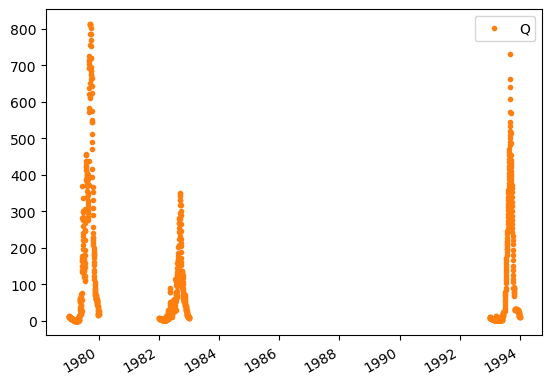

In [119]:
discharge_black_volta.plot(marker=".",lw=0,color="C1")

In [120]:
rainfall_black_volta = Rainfall_BF_msum[["Black_Volta"]].rename(columns={"Black_Volta":"P"})

<AxesSubplot: xlabel='Date'>

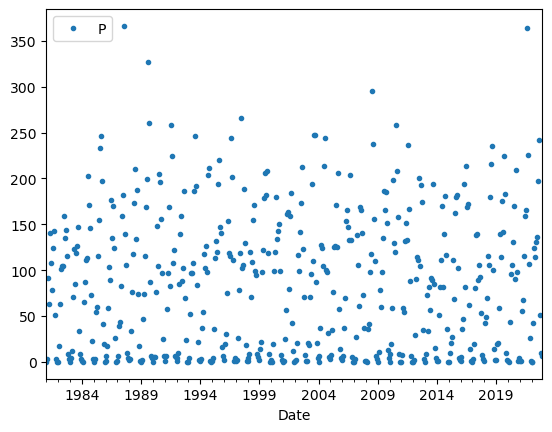

In [121]:
rainfall_black_volta.plot(marker=".",lw=0)

In [125]:
discharge_black_volta["P"] = rainfall_black_volta["P"]

<AxesSubplot: >

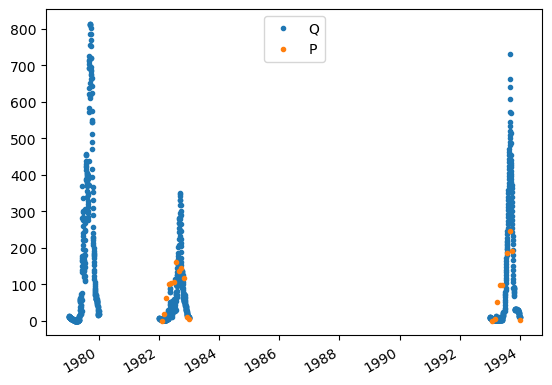

In [126]:
discharge_black_volta.plot(marker='.',lw=0)